In [282]:
import random

import keras.models
from skimage.io import imshow

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tools import sources
from tools import unetmodel
from tools import rect

from skimage.transform import resize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

X_train, Y_train = sources.flattened_trainset(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

100%|██████████| 670/670 [03:02<00:00,  3.66it/s]


In [24]:
model_1 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-1.h5')
predicted_1 = model_1.predict(X_train)

In [23]:
model_2 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-2.h5')
predicted_2 = model_2.predict(X_train)

In [18]:
ix = 1#random.randint(0, X_train.shape[0])


/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


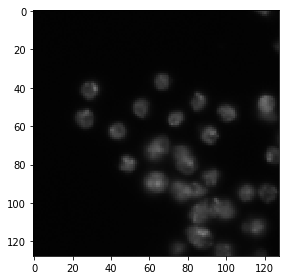

In [19]:
imshow(X_train[ix])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


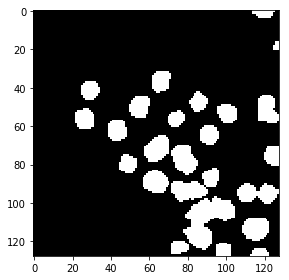

In [20]:
imshow(np.squeeze(Y_train[ix]))

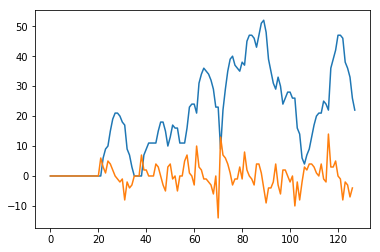

In [29]:
colsums = np.squeeze(Y_train[ix]).sum(axis=0)
plt.plot(colsums)
plt.plot(colsums[1:] - colsums[:-1])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


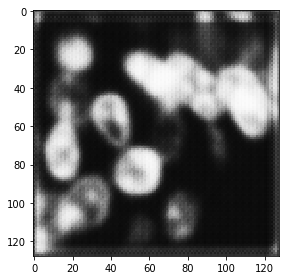

In [53]:
imshow(np.squeeze(predicted_1[ix]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


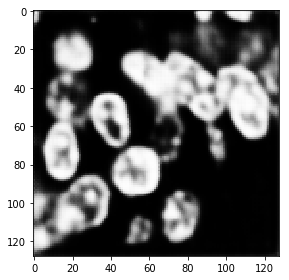

In [54]:
imshow(np.squeeze(predicted_2[ix]))

In [37]:
acc_2 = np.mean(np.squeeze(np.abs(Y_train - predicted_2)), axis=(1, 2))

In [38]:
acc_2[:10]
# Interesting indices 6 and 7

array([0.04806268, 0.047452  , 0.00689076, 0.05035172, 0.02980975,
       0.10703744, 0.10316637, 0.17804623, 0.11922193, 0.02537748],
      dtype=float32)

In [49]:
np.squeeze(predicted_2[ix]).shape

(128, 128)

In [4]:
img, mask = sources.raw_trainset(7)

In [5]:
img.shape

(256, 320, 4)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


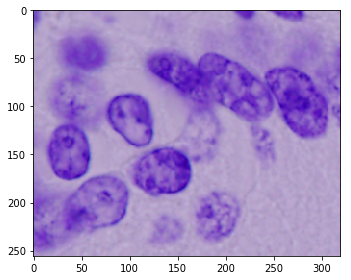

In [6]:
imshow(img)

In [7]:
mask[0].shape

(256, 320)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


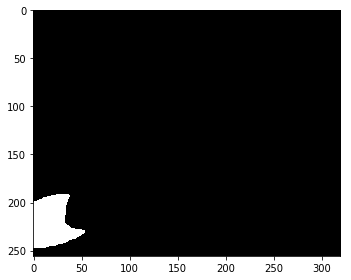

In [8]:
imshow(mask[7])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


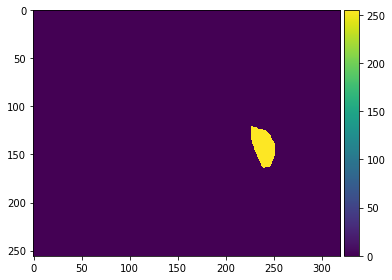

In [25]:
imshow(mask[1])

In [19]:
x_mask = np.max(mask[0], axis=0)
x_mask.argmax(), np.flip(x_mask, axis=0).argmax()

(241, 13)

In [103]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

tx, ty, tc, tw, th, tdx, tdy = sources.flattened_trainset_ex(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

100%|██████████| 670/670 [03:12<00:00,  3.48it/s]


In [104]:
model = unetmodel.u_net_model_ext(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [116]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint(sources.MODEL_PATH + '/model-dsbowl2018-unet-ext-1.h5', verbose=1, save_best_only=True)
results = model.fit(tx,
                    [ty, tc, tw, th, tdx, tdy],
                    validation_split=0.1,
                    batch_size=16,
                    epochs=4,
                    callbacks=[earlystopper, checkpointer])

Train on 603 samples, validate on 67 samples
Epoch 1/4
603/603 [==============================] - 489s 811ms/step - loss: 2.7182 - mask_loss: 0.2309 - centers_loss: 0.0253 - widths_loss: 0.0809 - heights_loss: 0.0802 - diffx_loss: 1.0197 - diffy_loss: 1.2812 - val_loss: 2.1989 - val_mask_loss: 0.2405 - val_centers_loss: 0.0259 - val_widths_loss: 0.0782 - val_heights_loss: 0.0763 - val_diffx_loss: 0.7584 - val_diffy_loss: 1.0197

Epoch 00001: val_loss improved from inf to 2.19893, saving model to /data/models/model-dsbowl2018-unet-ext-1.h5
Epoch 2/4
603/603 [==============================] - 477s 792ms/step - loss: 2.2071 - mask_loss: 0.1823 - centers_loss: 0.0208 - widths_loss: 0.0734 - heights_loss: 0.0731 - diffx_loss: 0.8508 - diffy_loss: 1.0068 - val_loss: 1.8669 - val_mask_loss: 0.1792 - val_centers_loss: 0.0180 - val_widths_loss: 0.0689 - val_heights_loss: 0.0675 - val_diffx_loss: 0.6099 - val_diffy_loss: 0.9233

Epoch 00002: val_loss improved from 2.19893 to 1.86686, saving mode

In [117]:
pred_ext = model.predict(tx)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


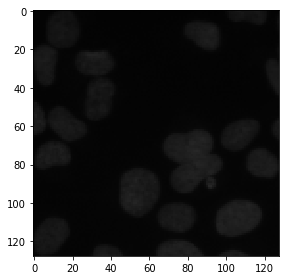

In [118]:
imshow(np.squeeze(tx[14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


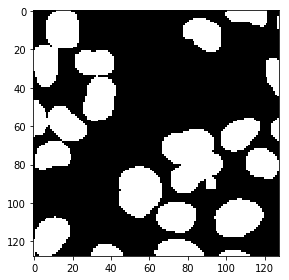

In [119]:
imshow(np.squeeze(ty[14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


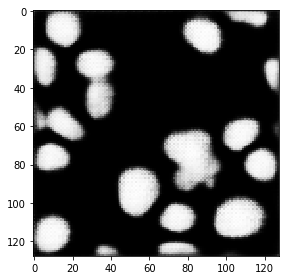

In [120]:
imshow(np.squeeze(pred_ext[0][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


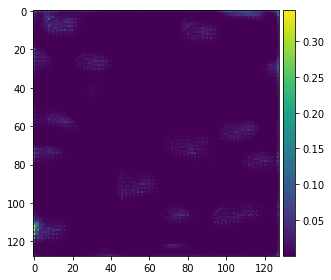

In [121]:
imshow(np.squeeze(pred_ext[1][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


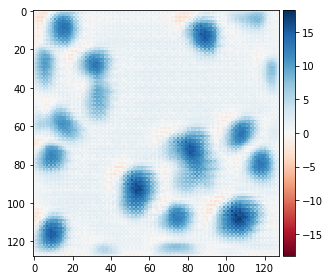

In [122]:
imshow(np.squeeze(pred_ext[2][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


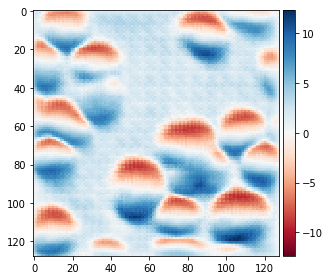

In [123]:
imshow(np.squeeze(pred_ext[5][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


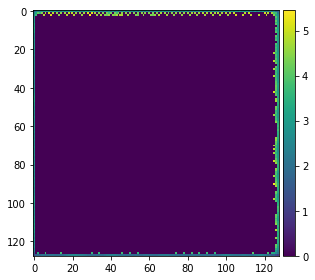

In [11]:
xx = np.squeeze(pred_ext[3][0])
pp = np.squeeze(pred_ext[1][0])
imshow(xx * (pp > 0.01).astype('float'))

In [132]:
np.max(pred_ext[2][3])

8.135359

In [55]:
img, mask = sources.raw_trainset(14)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


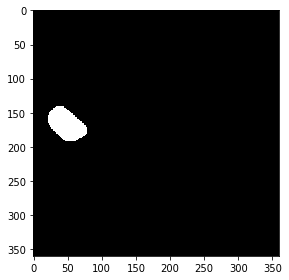

In [56]:
imshow(mask[0])

In [57]:
sources.inclusive_bounds(mask[0])

((21, 78), (140, 191))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


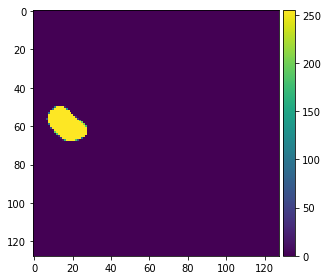

In [58]:
imshow(resize(mask[0], (IMG_WIDTH, IMG_HEIGHT), mode='constant', preserve_range=True))

In [72]:
sources.inclusive_bounds(resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


((8, 27), (50, 67))

In [21]:
mask[0].shape

(520, 696)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


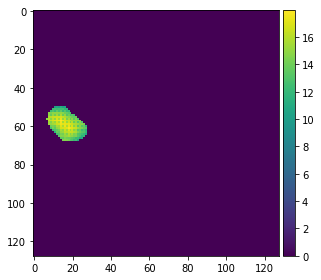

In [70]:
ixs = resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)) > 0
ww = np.squeeze(pred_ext[2][14])
imshow(ww * ixs.astype('float'))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with

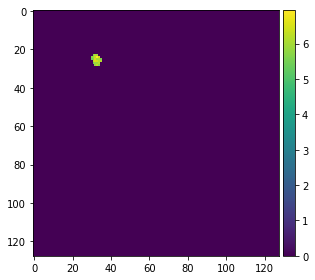

In [28]:
ixs = resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)) > 0
hh = np.squeeze(pred_ext[3][0])
imshow(hh * ixs.astype('float'))

In [80]:
np.outer(np.arange(10),np.ones(2)).T - 4

array([[-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]])

In [81]:
np.outer(np.arange(10), np.ones(2))

array([[0., 0.],
       [1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.],
       [6., 6.],
       [7., 7.],
       [8., 8.],
       [9., 9.]])

In [82]:
np.outer(np.ones(2), np.arange(10))

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [287]:
n = 14
diffx = np.squeeze(pred_ext[4][n])
diffy = np.squeeze(pred_ext[5][n])
glagla = ((np.abs(diffx) < 1) & (np.abs(diffy) < 1)).astype('float')
widths = np.squeeze(pred_ext[2][n])
heights = np.squeeze(pred_ext[3][n])

In [288]:
rows, cols = np.where((np.abs(diffx) < 1) & (np.abs(diffy) < 1))
brects = [(x, y, widths[y, x], heights[y, x]) for (y, x) in zip(rows, cols) if widths[y, x] > 2 and heights[y, x] > 2]
rects = [(max(0, x - w/2), max(0, y - h/2), x + w/2, y + h/2) for (x, y, w, h) in brects]

In [289]:
mask_pred = pred_ext[0][n]
rects = [(x1, y1, x2, y2) for (x1, y1, x2, y2) in rects if mask_pred[int(y1):int(y2), int(x1):int(x2)].mean() >= 0.5]
rects = sorted(rects)

In [290]:
rects = rect.merge(rects)

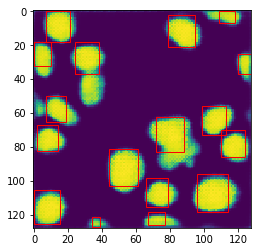

In [291]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.squeeze(pred_ext[0][n]))

for (x1, y1, x2, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((int(x1),int(y1)),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [ ]:
# TODO
# Square post processing (merging)
# Eliminate
# Metrics!